数据查看

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as sk
import warnings
import chardet
warnings.filterwarnings("ignore")
from pycaret.regression import *

In [15]:
data_rk = pd.read_excel('./入库流量数据.xlsx','Sheet1',index_col='TimeStample', encoding='utf-8')

In [16]:
data_rk[:-(31*8)*3]

,Qi
TimeStample,
2013-01-01 02:00:00,0.018201
2013-01-01 05:00:00,0.018196
2013-01-01 08:00:00,0.030095
2013-01-01 11:00:00,0.123196
2013-01-01 14:00:00,0.133178
...,...
2017-12-31 11:00:00,0.022744
2017-12-31 14:00:00,0.031933
2017-12-31 17:00:00,0.025255


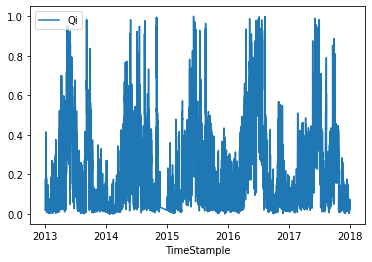

In [4]:
ax = sns.lineplot(data=data_rk[:-(31*8)*3])
plt.show()

In [5]:
data_rk.iloc[-(31*8):]

,Qi
TimeStample,
2018-10-01 02:00:00,0.456193
2018-10-01 05:00:00,0.442235
2018-10-01 08:00:00,0.437666
2018-10-01 11:00:00,0.461013
2018-10-01 14:00:00,0.437867
...,...
2018-10-31 11:00:00,0.194658
2018-10-31 14:00:00,0.087363
2018-10-31 17:00:00,0.085304


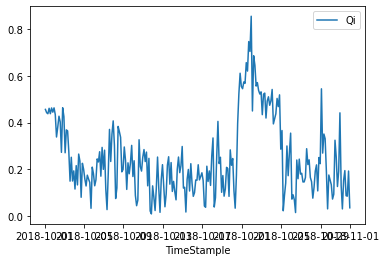

In [6]:
ax = sns.lineplot(data=data_rk.iloc[-(31*8):])
plt.show()

In [7]:
data_rk.iloc[-(31*8*2):-(31*8)]

,Qi
TimeStample,
2018-07-01 02:00:00,0.357283
2018-07-01 05:00:00,0.285184
2018-07-01 08:00:00,0.382839
2018-07-01 11:00:00,0.443290
2018-07-01 14:00:00,0.466586
...,...
2018-07-31 11:00:00,0.019230
2018-07-31 14:00:00,0.334789
2018-07-31 17:00:00,0.269167


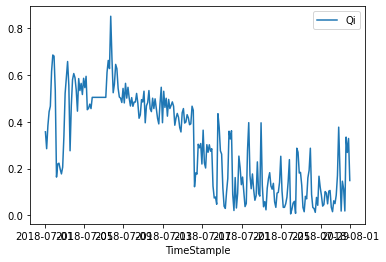

In [8]:
ax = sns.lineplot(data=data_rk.iloc[-(31*8*2):-(31*8)])
plt.show()

In [9]:
data_rk.iloc[-(31*8*3):-(31*8*2)]

,Qi
TimeStample,
2018-01-01 02:00:00,0.020184
2018-01-01 05:00:00,0.025757
2018-01-01 08:00:00,0.022995
2018-01-01 11:00:00,0.015113
2018-01-01 14:00:00,0.017975
...,...
2018-01-31 11:00:00,0.012904
2018-01-31 14:00:00,0.083145
2018-01-31 17:00:00,0.100517


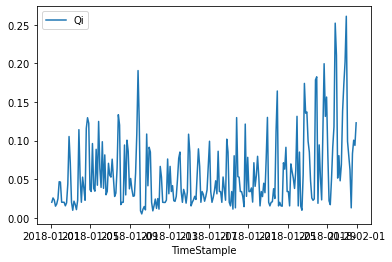

In [10]:
ax = sns.lineplot(data=data_rk.iloc[-(31*8*3):-(31*8*2)])
plt.show()

In [13]:
from sklearn.datasets import load_diabetes

def fun(x):
    if x >0:
        return 1
    else:
        return 0
# sklearn自带数据 diabetes 糖尿病数据集
diabetes=load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
#只抽取前80个数据
df=data[:80]
#由于diabetes中的数据均已归一化处理过，sex列中的值也归一化，现将其划分一下，大于0的设置为1，小于等于0的设置为0
df['sex']=df['sex'].apply(lambda x: fun(x))
#展示前5条数据
df[:5]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,1,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


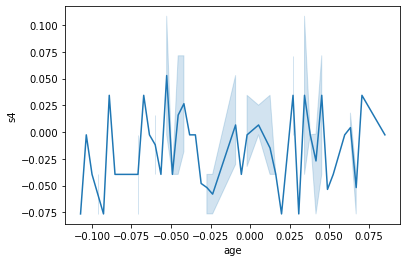

In [14]:
def fun(x):
    if x >0:
        return 1
    else:
        return 0
# sklearn自带数据 diabetes 糖尿病数据集
diabetes=load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
#只抽取前80个数据
df=data[:80]
#由于diabetes中的数据均已归一化处理过，sex列中的值也归一化，现将其划分一下，大于0的设置为1，小于等于0的设置为0
df['sex']=df['sex'].apply(lambda x: fun(x))

"""
案例1：绘制带有误差带的单线图，显示置信区间
"""
ax = sns.lineplot(x="age", y="s4",data=df)
plt.show()

In [11]:
from pmdarima.arima import auto_arima

In [12]:
data_x = data_rk[:-(31*8)*3]
data_y = data_rk.iloc[-(31*8):]
data_y_2 = data_rk.iloc[-(31*8*2):-(31*8)]
data_y_3 = data_rk.iloc[-(31*8*3):-(31*8*2)]

In [14]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Load/split your data
# y = pm.datasets.load_wineind()
train = data_y

# Fit your model
model = pm.auto_arima(train,
                      start_p=0,start_q=0,start_P=0,
                      max_p=12, max_q=12,
                      m=12, seasonal=True,
                      trace=True,
                      d=1, D=1,
                      method="basinhopping",
                      error_action='ignore',  # don't want to know if an order does not work
                      suppress_warnings=True,  # don't want convergence warnings
                      stepwise=True, njob=-1)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=40.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-213.204, Time=6.30 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-313.806, Time=62.52 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=51.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-241.700, Time=10.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-325.471, Time=58.06 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=352.72 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=129.88 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-294.957, Time=119.00 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-330.779, Time=194.78 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-317.101, Time=82.97 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=452.75 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=312.38 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-334.042, Time=432.57 sec
 ARIMA(3,1,0)(1,1,0)[12]     

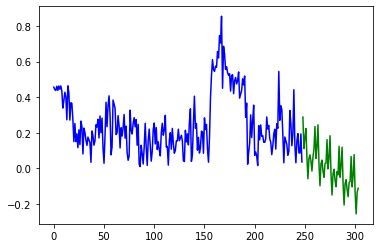

In [51]:
# make your forecasts
forecasts = model.predict(56)  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(data_y.shape[0]+56)
plt.plot(x[:-56], train, c='blue')
plt.plot(x[-56:], forecasts, c='green')
plt.show()

In [52]:
forecasts

array([ 0.28774108,  0.11103824,  0.17239953,  0.22356922,  0.06045907,
       -0.05900795,  0.05438573,  0.07542652,  0.03917203, -0.01579484,
        0.06233511,  0.10736955,  0.23458896,  0.05575577,  0.12404616,
        0.24420147,  0.02251222, -0.09874765,  0.02631198,  0.04594967,
       -0.01750948, -0.05089348,  0.02577806,  0.02845665,  0.16103948,
       -0.00381332,  0.06083664,  0.18273492, -0.03547245, -0.1505946 ,
       -0.03131737, -0.00564109, -0.06804477, -0.10311989, -0.01821178,
       -0.03651509,  0.12327984, -0.05061765,  0.01481098,  0.11845423,
       -0.08764904, -0.20652992, -0.08617907, -0.06429005, -0.12068802,
       -0.15994326, -0.08031356, -0.07377619,  0.06606167, -0.10510111,
       -0.03930523,  0.07640513, -0.13884628, -0.25667177, -0.13562584,
       -0.11263739])

In [ ]:
# Load/split your data
# y = pm.datasets.load_wineind()
train = data_y_2

# Fit your model
model = pm.auto_arima(train,
                      start_p=0,start_q=0,start_P=0,
                      max_p=12, max_q=12,
                      m=12, seasonal=True,
                      trace=True,
                      d=1, D=1,
                      method="basinhopping",
                      error_action='ignore',  # don't want to know if an order does not work
                      suppress_warnings=True,  # don't want convergence warnings
                      stepwise=True, njob=-1)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=65.20 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-227.397, Time=9.64 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-346.929, Time=47.73 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=138.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-228.257, Time=6.83 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-361.741, Time=197.36 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=401.41 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-390.309, Time=183.81 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=83.78 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=537.53 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=-387.845, Time=443.01 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=-389.081, Time=612.98 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-384.884, Time=75.84 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=-400.442, Time=248.51 sec
 ARIMA(2,1,0)(0,1,1)[12]

In [ ]:
# make your forecasts
forecasts2 = model.predict(56)  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(data_y_2.shape[0]+56)
plt.plot(x[:-56], train, c='blue')
plt.plot(x[-56:], forecasts2, c='green')
plt.show()

In [ ]:
# Load/split your data
# y = pm.datasets.load_wineind()
train = data_y_3

# Fit your model
model = pm.auto_arima(train,
                      start_p=0,start_q=0,start_P=0,
                      max_p=12, max_q=12,
                      m=12, seasonal=True,
                      trace=True,
                      d=1, D=1,
                      method="basinhopping",
                      error_action='ignore',  # don't want to know if an order does not work
                      suppress_warnings=True,  # don't want convergence warnings
                      stepwise=True, njob=-1)

In [ ]:
# make your forecasts
forecasts3 = model.predict(56)  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(data_y_3.shape[0]+56)
plt.plot(x[:-56], train, c='blue')
plt.plot(x[-56:], forecasts3, c='green')
plt.show()

In [ ]:
forecasts

In [ ]:
forecasts2

In [ ]:
forecasts3

In [47]:
result = pd.DataFrame([list(forecasts),list(forecasts2),list(forecasts3)])

In [48]:
result.to_csv("result_9_1_2.csv")